In [12]:
from __future__ import absolute_import, division

import tensorflow as tf
import tensorflow.keras as keras 

import numpy as np
from pathlib import Path 

import PIL 
import imageio
from IPython import display

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(False)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
import matplotlib.pyplot as plt
import sys 

sys.path.insert(0, "..")

from gan.networks import Generator, Discriminator, GAN

2.2.0
Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


In [6]:
model_path = Path("../gan/saved_models/20200610194954")

In [7]:
model_path.resolve()

PosixPath('/home/ganesh/workspace/python/GAN/gan/saved_models/20200610194954')

### Load Model

In [8]:
generator = keras.models.load_model(model_path / "generator_mnist450")

In [9]:
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense (Dense)                multiple                  1254400   
_________________________________________________________________
BatchNorm0 (BatchNormalizati multiple                  50176     
_________________________________________________________________
LeakyRelu0 (LeakyReLU)       multiple                  0         
_________________________________________________________________
Reshape1 (Reshape)           multiple                  0         
_________________________________________________________________
Con2DTranspose1 (Conv2DTrans multiple                  819200    
_________________________________________________________________
BatchNorm1 (BatchNormalizati multiple                  512       
_________________________________________________________________
LeakyRelu1 (LeakyReLU)       multiple                  0 

In [26]:
latent_dim = 100
num_images = 49
random_latent_vectors = tf.random.normal(shape=(num_images, latent_dim))
generated_images = generator(random_latent_vectors)

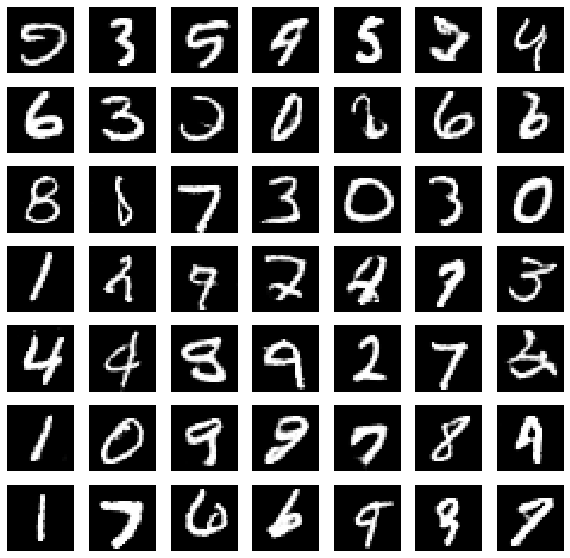

In [27]:
plt.figure(figsize=(10, 10))
for i in range(num_images):
	# define subplot
	plt.subplot(7, 7, 1 + i)
	# turn off axis labels
	plt.axis('off')
	# plot single image
	plt.imshow(generated_images[i, :, :, 0], cmap="gray")
# show the figure
plt.show()